# 1. Telecommunications Churn Analysis And Modeling

To:&nbsp;&nbsp;&nbsp;&nbsp; [Magnimind](https://magnimindacademy.com/)

From: Matt Curcio, matt.curcio.us@gmail.com

Date: 2022-12-27

Re:&nbsp;&nbsp;&nbsp; Churn Analysis from 10/5/2022 to 11/5/2022

<p align="center">
  <img src="../assets/ADD-Logo.jpg" width=120/>
</p>

>This report investigates the retention/churn of the fictional telecom company AD&D.

---

## Executive Summary

The loss of AD&D customers to competition is a constant problem. 


The aims of this analysis are to determine:

1. What factors are important for increasing retention? 
   
2. Can a mathematical model be developed for monthly prediction?


##  Initial Data Analysis

### NOTE 1
This data used for this analysis, `churn.all2` was provided by the maketing department, *Yasin Ceran*.

The loss of AD&D customers to competition is a constant problem. 

The marketing department provided a dataset containing retention data from Oct 5 to Nov. 5 for analysis. 

Between Oct 5 to Nov. 5, where 14.1% of AD&D customers left (1 out of 7) between the two dates.

| Customer Loss/Retention Rates | Counts | Percent |
|:------------------------------|-------:|--------:|
|                Lost (Churned) |    707 |   14.1% | 
|           Retained (No-Churn) |   4293 |   85.9% |

### Data Preparation

In [3]:
# Common Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
path = '../data/raw/'
fileName = 'churn.all2'

# Change column names for clarity
col_names = ['State','Act_Len','Area_Code','Phone_Number','Int_Plan',
             'VM_Plan','Num_VM','T_D_Min','T_D_Calls','T_D_Charge',
             'T_E_Min','T_E_Calls','T_E_Charge','T_N_Min','T_N_Calls',
             'T_N_Charge','T_I_Min','T_I_Calls','T_I_Charge','Num_Srv_Calls',
             'Churned']

# NOTE: File churn.all2 contains '?' instead of Null or Nan.
df = pd.read_csv(path+fileName, names=col_names, header=0, na_values='?')

# insert isna.sum
df.isna().sum()

State            0
Act_Len          0
Area_Code        0
Phone_Number     0
Int_Plan         0
VM_Plan          0
Num_VM           0
T_D_Min          0
T_D_Calls        0
T_D_Charge       0
T_E_Min          0
T_E_Calls        0
T_E_Charge       5
T_N_Min          0
T_N_Calls        0
T_N_Charge       0
T_I_Min          0
T_I_Calls        0
T_I_Charge       1
Num_Srv_Calls    0
Churned          0
dtype: int64

In [5]:
print(f'\nFile "{fileName}" has ',
      df.shape[0], 'Observations &', df.shape[1], 'features.\n')
print(f'Column names are:\n\n', df.columns)

df.head(5)


File "churn.all2" has  5000 Observations & 21 features.

Column names are:

 Index(['State', 'Act_Len', 'Area_Code', 'Phone_Number', 'Int_Plan', 'VM_Plan',
       'Num_VM', 'T_D_Min', 'T_D_Calls', 'T_D_Charge', 'T_E_Min', 'T_E_Calls',
       'T_E_Charge', 'T_N_Min', 'T_N_Calls', 'T_N_Charge', 'T_I_Min',
       'T_I_Calls', 'T_I_Charge', 'Num_Srv_Calls', 'Churned'],
      dtype='object')


,State,Act_Len,Area_Code,Phone_Number,Int_Plan,VM_Plan,Num_VM,T_D_Min,T_D_Calls,T_D_Charge,...,T_E_Calls,T_E_Charge,T_N_Min,T_N_Calls,T_N_Charge,T_I_Min,T_I_Calls,T_I_Charge,Num_Srv_Calls,Churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,NaN,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          5000 non-null   object 
 1   Act_Len        5000 non-null   int64  
 2   Area_Code      5000 non-null   int64  
 3   Phone_Number   5000 non-null   object 
 4   Int_Plan       5000 non-null   object 
 5   VM_Plan        5000 non-null   object 
 6   Num_VM         5000 non-null   int64  
 7   T_D_Min        5000 non-null   float64
 8   T_D_Calls      5000 non-null   int64  
 9   T_D_Charge     5000 non-null   float64
 10  T_E_Min        5000 non-null   float64
 11  T_E_Calls      5000 non-null   int64  
 12  T_E_Charge     4995 non-null   float64
 13  T_N_Min        5000 non-null   float64
 14  T_N_Calls      5000 non-null   int64  
 15  T_N_Charge     5000 non-null   float64
 16  T_I_Min        5000 non-null   float64
 17  T_I_Calls      5000 non-null   int64  
 18  T_I_Char

### Descriptive Statistics: 

In [7]:
print('\nDescriptive statistics of np.numeric data')
df.describe(include=[np.number]).T


Descriptive statistics of np.numeric data


,count,mean,std,min,25%,50%,75%,max
Act_Len,5000.0,100.258600,39.694560,1.0,73.000,100.00,127.00,243.00
Area_Code,5000.0,436.911400,42.209182,408.0,408.000,415.00,415.00,510.00
Num_VM,5000.0,7.755200,13.546393,0.0,0.000,0.00,17.00,52.00
T_D_Min,5000.0,180.288900,53.894699,0.0,143.700,180.10,216.20,351.50
T_D_Calls,5000.0,100.029400,19.831197,0.0,87.000,100.00,113.00,165.00
T_D_Charge,5000.0,30.649668,9.162069,0.0,24.430,30.62,36.75,59.76
T_E_Min,5000.0,200.636560,50.551309,0.0,166.375,201.00,234.10,363.70
T_E_Calls,5000.0,100.191000,19.826496,0.0,87.000,100.00,114.00,170.00
T_E_Charge,4995.0,17.052324,4.297856,0.0,14.135,17.09,19.90,30.91
T_N_Min,5000.0,200.391620,50.527789,0.0,166.900,200.40,234.70,395.00


In [8]:
print('\nCounts of object data.')
df.describe(include=[object]).T


Counts of object data.


,count,unique,top,freq
State,5000,51,WV,158
Phone_Number,5000,5000,382-4657,1
Int_Plan,5000,2,no,4527
VM_Plan,5000,2,no,3677
Churned,5000,2,False.,4293


### Clean and Save Data For Further Analysis

### NOTE 2

- Based on correlation coefficients (data not shown here) and discussions with the Yasin Ceran, it was decided `state`, `area_code`, `phone_number` will not be used in this analysis.

- Convert features `intl_plan`, `voice_mail_plan` from {yes, no} to integers {0,1}.  

- Convert feature `churned` from {True, False} to integers {0,1}.

In [10]:
df.head(5)

,State,Act_Len,Area_Code,Phone_Number,Int_Plan,VM_Plan,Num_VM,T_D_Min,T_D_Calls,T_D_Charge,...,T_E_Calls,T_E_Charge,T_N_Min,T_N_Calls,T_N_Charge,T_I_Min,T_I_Calls,T_I_Charge,Num_Srv_Calls,Churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,NaN,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [11]:
#drop multiple columns by name
df.drop(['State','Phone_Number','Area_Code'], axis=1, inplace=True)

# Convert international plan, Voice mail plan and Churned to binary
df['Int_Plan'] = df['Int_Plan'].apply(lambda x: 0 if x.strip() == 'no' else 1).astype('int8')
df['VM_Plan'] = df['VM_Plan'].apply(lambda x: 0 if x.strip() == 'no' else 1).astype('int8')
df['Churned'] = df['Churned'].apply(lambda x: 0 if x.strip() == 'False.' else 1).astype('int8')

In [12]:
# Save Cleaned Data
path = '../data/processed/'
save_to_file = "mcc_clean_churn.csv"

df.to_csv(path+save_to_file)

print(f'\nFile "{save_to_file}" has ',df.shape[0],'Observations &',df.shape[1],'features.\n')
print(f'Column names are:\n\n', df.columns)

print('\nAny NULL values:', df.isnull().values.any())
print('\nAny NaN values:', df.isna().values.any(), '\n')
print(55 * '=')


File "mcc_clean_churn.csv" has  5000 Observations & 18 features.

Column names are:

 Index(['Act_Len', 'Int_Plan', 'VM_Plan', 'Num_VM', 'T_D_Min', 'T_D_Calls',
       'T_D_Charge', 'T_E_Min', 'T_E_Calls', 'T_E_Charge', 'T_N_Min',
       'T_N_Calls', 'T_N_Charge', 'T_I_Min', 'T_I_Calls', 'T_I_Charge',
       'Num_Srv_Calls', 'Churned'],
      dtype='object')

Any NULL values: True

Any NaN values: True 



## Exploratory Data Analysis

### The Pandas_Profiling_Module

- Information on the Pandas Profiling library can be found at :https://pypi.org/project/pandas-profiling/
        
- The Pandas Profiling Module is very easy to use and retreive information from. One negative about the module is that it generated >400 pages of PDF data. However, the information rate per page was low. 

- The Pandas Profiling Module has some *interactive Interaction diagrams*. **See Appendix 1**

- For example, the *Pandas Profiling Module* **provided 15 Alerts for the raw data "churn.all2"**.


| Alert | Message |
|:------|:--------|
| state has a high cardinality: 51 distinct values | High cardinality |
| phone_number has a high cardinality: 5000 distinct values | High cardinality |
| number_vmail_messages is highly overall correlated with voice_mail_plan | High correlation |
| total_day_minutes is highly overall correlated with total_day_charge | High correlation |
| total_day_charge is highly overall correlated with total_day_minutes | High correlation |
| total_night_minutes is highly overall correlated with total_night_charge | High correlation |
| total_night_charge is highly overall correlated with total_night_minutes | High correlation |
| total_intl_minutes is highly overall correlated with total_intl_charge | High correlation |
| total_intl_charge is highly overall correlated with total_intl_minutes | High correlation |
| voice_mail_plan is highly overall correlated with number_vmail_messages | High correlation |
| number_vmail_messages has 3678 (73.6%) zeros | Zeros |
| number_customer_service_calls has 1023 (20.5%) zeros | Zeros |


**NOTE** See [Churn Report](../assets/churn_eda_profiling_report.html) for more information:

### Histograms Of Clean Churn Data

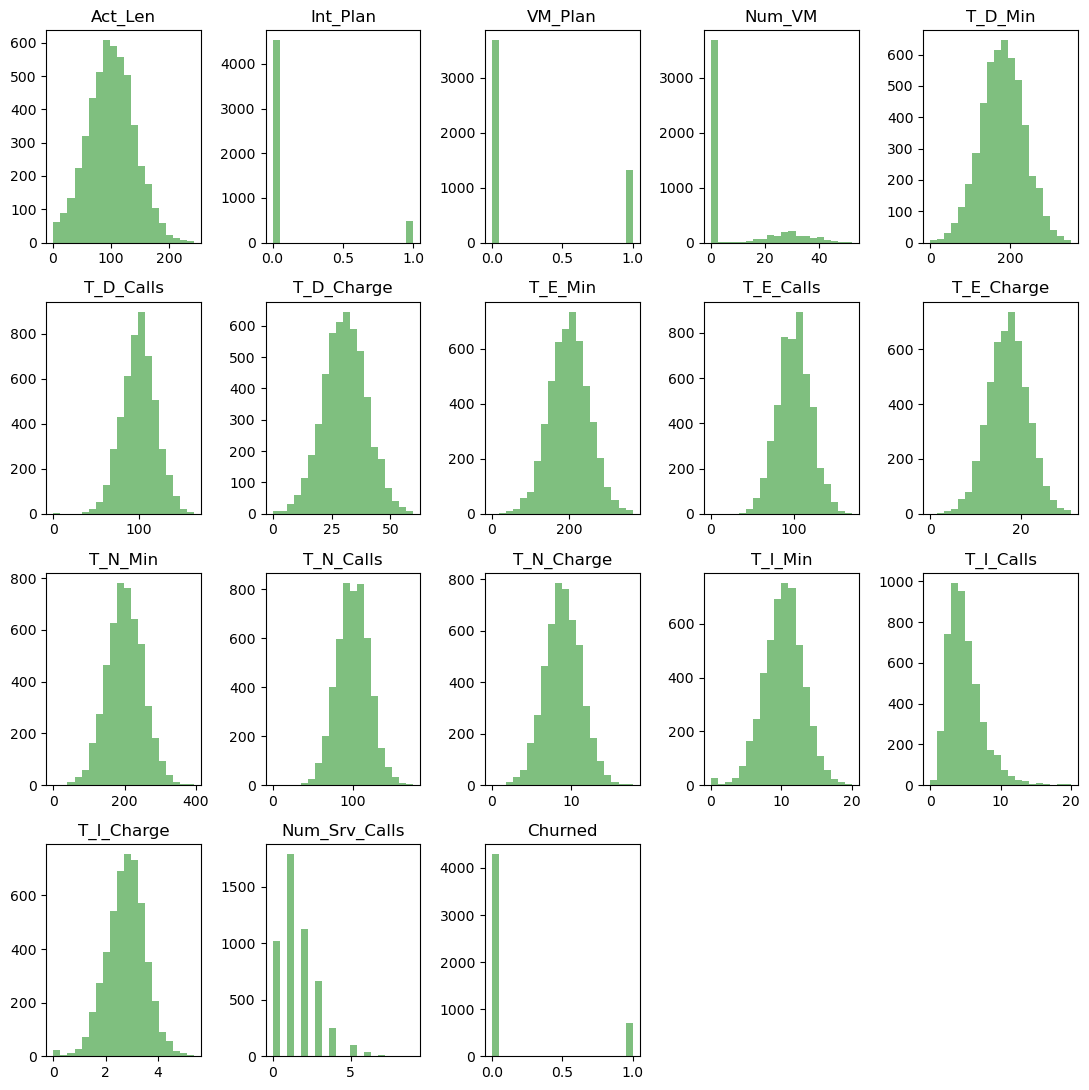

Col#	Mean	Med.	Sigma	Skew	Kurtosis
0	100.3	100.0	39.7	0.11	-0.10
1	0.1	0.0	0.3	2.77	5.68
2	0.3	0.0	0.4	1.07	-0.86
3	7.8	0.0	13.5	1.35	0.20
4	180.3	180.1	53.9	-0.01	-0.02
5	100.0	100.0	19.8	-0.08	0.18
6	30.6	30.6	9.2	-0.01	-0.02
7	200.6	201.0	50.6	-0.01	0.05
8	100.2	100.0	19.8	-0.02	0.12
9	17.1	17.1	4.3	-0.01	0.05
10	200.4	200.4	50.5	0.02	0.08
11	99.9	100.0	20.0	0.00	0.14
12	9.0	9.0	2.3	0.02	0.08
13	10.3	10.3	2.8	-0.21	0.66
14	4.4	4.0	2.5	1.36	3.27
15	2.8	2.8	0.7	-0.21	0.66
16	1.6	1.0	1.3	1.04	1.48
17	0.1	0.0	0.3	2.06	2.24


In [2]:
%run 3_ADD_EDA_Histograms.ipynb

### Pearson's Pairwise Correlation

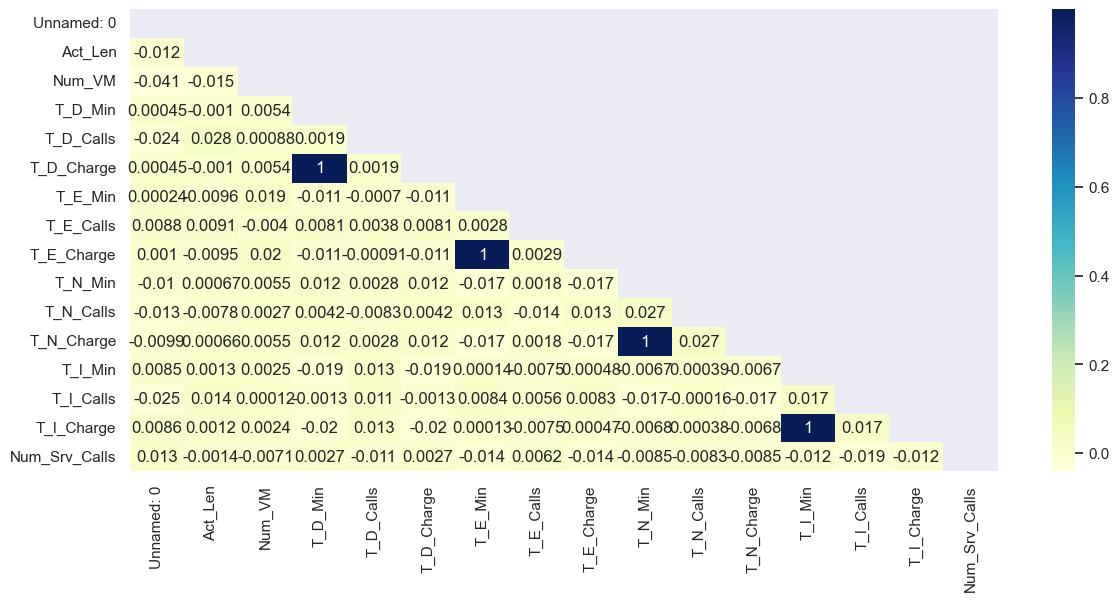


Drop T_D_Min

T_D_Charge => 0.20769977695633648

T_D_Min => 0.20770519477848012

Drop T_E_Min

T_E_Charge => nan

T_E_Min => 0.08928848603793108

Drop T_N_Min

T_N_Charge => 0.04567252950480982

T_N_Min => 0.04567672039250784

Drop T_I_Min

T_I_Charge => nan

T_I_Min => 0.0632848878398785
Phi_a = 3335
Phi_b = 1192
Phi_c = 342
Phi_d = 131

The numerator of Phi = 29221

The denominator of Phi = 3227472

Phi Coefficient = 0.009


In [13]:
%run 4_ADD_Correlations_Cont_Cat_Vars.ipynb

### NOTE 3
    
1. With respect to `Churned` 4 features have the highest correlations 
    1. `Int_Plan` 
    2. `VM_Plan`
    3. `T_D_Min`
    4. `Num_Srv_Calls`
    5. 
</br>

1. The five strongly red correlation coefficients near the hypotenuse are collinear variables.

    1. `VM_Plan`:`Num_VM`
    2. `T_D_Minutes`:`T_D_Charge`
    3. `T_E_Min`:`T_E_Charge`
    4. `T_N_Min`:`T_N_Charge`
    5. `T_I_Min`:`T_I_Charge`

</br>
  
3. Consider removing All Total Charges:
    

## Logistic Regression Model

In [1]:
%run Logistic_Regression_Grid_Search.ipynb

Exception: File `'Logistic_Regression_Grid_Search.ipynb'` not found.

## Appendices

### Pandas Profiling Module

In [ ]:
%run Appendix_1_EDA_Using_Pandas_Profiling_Module.ipynb

### PCA_Bigram_Example_of_Churn_Data_Using_Plotly

In [ ]:
%run Appendix_2_PCA_Bigram_Example_of_Churn_Data_Using_Plotly.ipynb